# HW4 : A visit to the movie zoo!

![](https://vignette.wikia.nocookie.net/bojackhorseman/images/f/f2/HSACWDTK%3FDTKT%3FLFO%21%21.png/revision/latest?cb=20150720050503)

## Task
In this homework, your task is to visualize THREE non-typical charts on anything related to your favorite **movie star!**
This means you CANNOT use the Big 4 chart types or their close variants (i.e. Pie, Bar, Line and Scatter, Area, etc.)

You are free to use any other chart type whether or not they were covered in class!
The lecture on Visit To The Zoo is a good place to start to get ideas on what kinds of charts exist.

For the data, you are free to use any data source you deem fit.
For charting, we will NOT be constraining the technology you use. 
You are free to produce the charts in any way you would like.

You will be judged on
* Creativity
* Presentation Quality
* Data Quality (Did your visualization reveal something interesting?)

For extra credit, you can make a fully interactive visualization.

### 1. movies timeline
### 2. relatives network diagram
### 3. word cloud for interview/line
### 4. sales data on map

## Ideas for Data Collection

Here, we show an example of how to collect data about Arnold Schwarzenegger!
Do note that this is just an example of the kind of data you can collect.
You are **NOT** constrained
* To the same movie star (you can pick your own!)
* To the same *kind* of data
* To the same data sources
* or to anything else!

This assignment gives you the power to do what you like!

In [1]:
from imdbpie import ImdbFacade
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import urllib.request
import re
import pandas as pd
import numpy as np
import json

#### Get data for Arnold Schwarzenegger

In [9]:
# Get an instance of IMDb class
imdb = ImdbFacade()

# Search for Arnold Schwarzenegger
people = imdb.search_for_name('Robert Downey Jr.')
print(people)

(NameSearchResult(imdb_id='nm0000375', name='Robert Downey Jr.'), NameSearchResult(imdb_id='nm0002049', name='Robert Downey Sr.'), NameSearchResult(imdb_id='nm7311464', name='Robert Downey'), NameSearchResult(imdb_id='nm10564292', name='Robert Downey'))


In [10]:
# Fetch information about him
Downey = imdb.get_name(people[0].imdb_id)

# What information do I have about him?
print('\n'.join([x for x in dir(Downey) if not x.startswith('__')]))

bios
birth_place
date_of_birth
filmography
gender
image
imdb_id
name


In [74]:
Downey.filmography

('tt1730763',
 'tt6534532',
 'tt2461172',
 'tt2094116',
 'tt3480822',
 'tt6673612',
 'tt4154796',
 'tt4154756',
 'tt2250912',
 'tt7006122',
 'tt3498820',
 'tt2395427',
 'tt1872194',
 'tt2883512',
 'tt1300854',
 'tt0848228',
 'tt1515091',
 'tt1231583',
 'tt1686782',
 'tt1228705',
 'tt0988045',
 'tt0821642',
 'tt1286750',
 'tt0942385',
 'tt0800080',
 'tt1233205',
 'tt0371746',
 'tt0423977',
 'tt0338216',
 'tt3492560',
 'tt0443706',
 'tt0422295',
 'tt0405296',
 'tt0393735',
 'tt0473488',
 'tt0182576',
 'tt0433383',
 'tt0373469',
 'tt0425055',
 'tt3447362',
 'tt0343663',
 'tt0348836',
 'tt0344554',
 'tt0314676',
 'tt0118254',
 'tt0358565',
 'tt6322486',
 'tt0403851',
 'tt0185014',
 'tt0165643',
 'tt0131325',
 'tt0143261',
 'tt0120710',
 'tt0120873',
 'tt0119196',
 'tt0119327',
 'tt0124179',
 'tt0119832',
 'tt0116016',
 'tt0114272',
 'tt0124013',
 'tt0113321',
 'tt0114279',
 'tt0110737',
 'tt0110632',
 'tt0109969',
 'tt0108122',
 'tt0107091',
 'tt0103939',
 'tt0102951',
 'tt0103100',
 'tt00

In [11]:
# How many movies does he have?
print(len(Downey.filmography))

416


In [20]:
# Let's fetch some more information about a movie
movie = imdb.get_title(Downey.filmography[13])

In [14]:
# What information can I get about this movie?
print('\n'.join([x for x in dir(movie) if not x.startswith('__')]))

certification
creators
credits
directors
episode
episodes
genres
image
imdb_id
plot_outline
rating
rating_count
release_date
releases
runtime
season
stars
title
type
writers
year


In [22]:
print(movie.title)

Chef


In [12]:
html = """
    <div style="background-color:#FFDDDD">
    <h2> Warning! </h2>
    <p> This code below is meant to be an example of what you can do. <br>
        It is not guaranteed to work always, and will need to be tweaked!
    </p>
    </div>
"""
display(HTML(html))

#### Box office numbers

In [2]:

#url = 'https://www.boxofficemojo.com/releasegroup/gr3511898629/?ref_=bo_tt_gr_1'
url = 'https://www.boxofficemojo.com/releasegroup/gr2956087813/?ref_=bo_tt_gr_1'
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')

In [3]:
data = {}
earnings = soup('div', {'class': 'a-section a-spacing-none'})[3]
tables = earnings('table')

market = tables[0].find('a', {'class': 'a-link-normal'}).get_text()
money = tables[0]('span', {'class': 'money'})[-1].get_text()
data['United States'] = money

In [9]:
len(markets)

42

In [11]:
for table in tables[1:]:
    markets = table('a', {'class': 'a-link-normal'})
    moneys = table('td', {'class': 'a-text-right a-align-center'})
    for i in range(len(markets)):
        try:
            data[markets[i].get_text()] = moneys[2*i + 1].find('span').get_text()
        except:
            print(markets[i])

<a class="a-link-normal" href="/release/rl2467137281/?ref_=bo_gr_rls">North Macedonia</a>
<a class="a-link-normal" href="/release/rl2332919553/?ref_=bo_gr_rls">Pakistan</a>


In [13]:
for m in data:
    data[m] = int(data[m].strip('$').replace(',',''))

In [21]:
df = pd.Series(data).to_frame().reset_index()
df = df.rename(columns = {0: 'Sales', 'index': 'Countries'})
df['SalesLog'] = df['Sales'].apply(np.log)
df

,Countries,Sales,SalesLog
0,United States,318604126,19.579460
1,Austria,1018284,13.833629
2,Belgium,1970548,14.493822
3,Bulgaria,157124,11.964791
4,Croatia,162294,11.997165
5,Cyprus,52499,10.868549
6,Czech Republic,400223,12.899777
7,Czech Republic/Slovakia,467215,13.054545
8,Denmark,2220811,14.613383
9,East Africa,93840,11.449346


In [6]:
df = pd.read_csv('country_sales.csv')
df['SalesLog'] = df['Sales'].apply(np.log)

In [22]:
df.to_csv('country_sales_log_2.csv')

In [81]:
pd.Series(data).to_frame().reset_index().to_csv('country_sales.csv')

In [7]:
def domesticEarning(imdb_id):
    base = 'https://www.boxofficemojo.com'
    url = base + '/title/' + imdb_id
    source = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(source,'lxml')

    table = soup('th', text=re.compile(r'Release Group'))[0].parent.parent
    group = table.findAll('tr', recursive=False)[1].find('a').get('href')
    url = base + group

    # Get total earnings domestic and international
    source = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(source,'lxml')
    earnings = soup('h2', text=re.compile(r'Rollout'))[0].parent.parent.findAll('div')

    domestic = earnings[1].find('span', {'class': 'money'}).get_text()
    return int(domestic.replace('$', '').replace(',', ''))

In [ ]:
movieDomestic = {}
for movieid in Downey.filmography:
    print(movieid)
    try:
        movie = imdb.get_title(movieid)
        if not movie.year:
            movieDomestic[movie.title] = domesticEarning(movieid)
    except:
        print('not found')

In [12]:
# Let's experiment with Terminator
imdb_id = 'tt4154796'

# Fetch the box office numbers
base = 'https://www.boxofficemojo.com'
url = base + '/title/' + imdb_id
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')

table = soup('th', text=re.compile(r'Release Group'))[0].parent.parent
group = table.findAll('tr', recursive=False)[1].find('a').get('href')
url = base + group

# Get total earnings domestic and international
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')
earnings = soup('h2', text=re.compile(r'Rollout'))[0].parent.parent.findAll('div')

domestic = earnings[1].find('span', {'class': 'money'}).get_text()
domestic_url = earnings[1].find('a').get('href')
international = earnings[2].find('span', {'class': 'money'}).get_text()

# Get weekly domestic earnings
url = base + domestic_url
url = url[:url.rfind('/')] + '/weekly/'
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')
table = soup.find('div', {'class':'a-section imdb-scroll-table-inner'}).findAll('tr')
weekly = []
for tr in table[1:]:
    date = tr.findAll('td')[0].get_text()
    earning = tr.findAll('td')[2].get_text()
    weekly.append((date, earning))

# Print the values we've just got!
print("Total Domestic Earnings: %s" % domestic)
print("Total International Earnings: %s" % international)
print("Weekly Domestic Earnings:")
for date, earning in weekly:
    print("\t%s \t: %s" % (date, earning))

Total Domestic Earnings: $858,373,000
Total International Earnings: $1,939,427,564
Weekly Domestic Earnings:
	Apr 26-May 2 	: $473,894,638
	May 3-9 	: $186,551,101
	May 10-16 	: $80,949,131
	May 17-23 	: $39,936,866
	May 24-30 	: $26,357,048
	May 31-Jun 6 	: $11,877,156
	Jun 7-13 	: $7,408,419
	Jun 14-20 	: $5,634,607
	Jun 21-27 	: $3,172,195
	Jun 28-Jul 4 	: $8,981,672
	Jul 5-11 	: $4,745,306
	Jul 12-18 	: $3,509,054
	Jul 19-25 	: $2,606,556
	Jul 26-Aug 1 	: $1,472,586
	Aug 2-8 	: $623,433
	Aug 9-15 	: $321,878
	Aug 16-22 	: $146,769
	Aug 23-29 	: $70,586
	Aug 30-Sep 5 	: $94,684
	Sep 6-12 	: $19,315


In [61]:
import re
from collections import defaultdict
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [62]:
characLines = defaultdict(list)
with open('lines.txt') as f:
    for line in f.readlines():
        if not re.findall(r'[\u4e00-\u9fff]+', line) and not re.findall(r'[=【]', line):
            if line.startswith('-'):
                character = line[line.index('-')+1: line.index(':')]
                if 'Terrorist' in character:
                    character = 'Terrorist'
                characLines[character].append(line[line.index(':') + 1:].strip())
            else:
                characLines[character].append(line.strip())


In [65]:
characLines.keys()

dict_keys(['Tony', 'Forest', 'Driver', 'Jimmy', 'Award Ceremony Narrator', 'Rhodes', 'Obadiah', 'Christine', 'Security', 'Jarvis', 'Pepper', 'Pilot', 'Airline hostess', 'General', 'Yinsen', 'Terrorist', ' Hogan', 'Coulson', 'Reporter A', 'TV show', 'Obie', 'TV', 'Woman', 'Boy', 'Man A', 'Man B', 'Major', 'Man C', 'Man D', 'Whiplash One', 'Whiplash Two', 'All', ' William', 'Reporter', 'Fury'])

In [66]:
for c in characLines.keys():
    characLines[c] = ' '.join(characLines[c])

In [67]:
tony = characLines['Tony']

In [95]:
stop_words = stopwords.words('english')
stop_words.extend(['im', 'gonna', 'go', 'tell', 'yeah'])

In [150]:
porter = PorterStemmer()

In [159]:
def cleanLines(data):
    punctuations = string.punctuation
    data = data.translate(str.maketrans('', '', punctuations))
    data = data.lower()  
    words = [w for w in data.split() if not w in stop_words]
    #words = [porter.stem(w) for w in words]
    return ' '.join(words)

In [69]:
['Tony', 'Pepper', 'Jarvis', 'Terrorist']

['Tony', 'Pepper', 'Jarvis', 'Terrorist']

In [70]:
cleanLines(characLines['All'])

'got chute got chute'

In [157]:
cleanLines(characLines['Tony'])

'feel like your drive court martial crazi feel like your pull snuff your allow talk hey forest oh see person dear god your woman honestli couldnt call mean would apolog isnt go thought soldier first well actual excel bone structur kinda hard time look weird cmon ok laugh hey ye pleas excel question ye march schedul conflict fortun christma cover twin anyth els your kid hand right ye cool dont wanna see myspac page pleas gang sign throw kid peac love peac id outta job peac what go wait wait give gun cmon stay till morn oh rope cours id deepli honor that great one round easi sorri wow would look that that someth els dont swoop around right ride give hand ok lieuten colonel rhode roll wors thing happen think fine color count know know render unto caesar caesar she alright hi okay absolut ridicul dont paint that bad let guess berkeley well ms brown imperfect world one weve got guarante day weapon longer need keep peac we’ll start make brick beam babi hospit everi night front mirror bedtim 

In [146]:
def wordFreq(data, thre):
    dic = {}
    for w in set(data.split()):
        count = data.count(w)
        if count < thre:
            dic[w] = count
    result = []
    for d in dic:
        result.append({'tag':d, 'count':str(dic[d])})
    return result

In [147]:
wordFreq(cleanLines(characLines['Tony']), 10)

[{'tag': 'lovely', 'count': '1'},
 {'tag': 'report', 'count': '1'},
 {'tag': 'say', 'count': '9'},
 {'tag': 'many', 'count': '2'},
 {'tag': 'wild', 'count': '2'},
 {'tag': 'bone', 'count': '1'},
 {'tag': 'catch', 'count': '2'},
 {'tag': 'snuff', 'count': '1'},
 {'tag': 'killed', 'count': '1'},
 {'tag': 'told', 'count': '3'},
 {'tag': 'press', 'count': '2'},
 {'tag': 'nostalgic', 'count': '1'},
 {'tag': 'never', 'count': '5'},
 {'tag': 'could', 'count': '5'},
 {'tag': 'newsreels', 'count': '1'},
 {'tag': 'shipping', 'count': '1'},
 {'tag': 'line', 'count': '3'},
 {'tag': 'mightve', 'count': '1'},
 {'tag': '015', 'count': '1'},
 {'tag': 'saved', 'count': '1'},
 {'tag': 'poker', 'count': '1'},
 {'tag': 'obie', 'count': '4'},
 {'tag': 'guarantee', 'count': '2'},
 {'tag': 'ahead', 'count': '1'},
 {'tag': 'telling', 'count': '1'},
 {'tag': 'happens', 'count': '1'},
 {'tag': 'best', 'count': '1'},
 {'tag': 'probably', 'count': '2'},
 {'tag': 'reading', 'count': '1'},
 {'tag': 'christmas', 'co

In [133]:
def removeCommon(data, thre):
    dic = {}
    for w in set(data.split()):
        dic[w] = data.count(w)
    s = pd.Series(dic)
    s = s[s < thre]
    d = ''
    for ind in s.index:
        d = d + ' ' + ' '.join([ind for i in range(s[ind])])
    return d

In [161]:
removeCommon(cleanLines(characLines['Jarvis']), 20)

' probable malibu fatal please altitude altitude altitude oh perhaps still never help proposed note line line line uploaded begin assembly time hours 13 flight flight flight profile tide using chest keep high high ice ice 11。 test sir sir sir sir sir sir sir sir sir sir sir sir sir sir sir sir highlines transducer systems 19 reduced 85000 occurring central planets invitation bad compression isnt shoulder intend execute specifications going fair surf service shall shall estimated usually 15 cylinder five authorized working actual repulsors 48 low low 72 calculations sluggish yes yes potentially ready complete complete complete piece visit record record home project observation odds morning pressurization exo icy factor 40 improve 1052 move theyve astute render render render degrees thinking thinking plus 3 3 clouds completion designed main power power power power power power 7。 feels area falling 7 7 7 7 store feet try preparing waist secret access fixedwing online terabytes automated h

In [120]:
['s' for i in range(9)]

['s', 's', 's', 's', 's', 's', 's', 's', 's']

In [2]:
url = 'https://www.imdb.com/name/nm0000375/'
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')

In [24]:
idMovie = {}
idYear = {}

movies = soup.find('div', {'class': 'filmo-category-section'})('div', class_=re.compile(r'filmo-row'))
for m in movies:
    if '(' not in m.contents[4]:
        mid = re.findall(r'tt\d+' ,m.find('a')['href'])[0]
        name = m.find('a').get_text()
        year = int(m.find('span').get_text()[2:6])
        idMovie[mid] = name
        idYear[mid] = year

In [4]:
movieSales = {}

In [ ]:
movieYear = 

In [28]:
df = pd.Series(movieSales).to_frame().reset_index()
df['year'] = df['index'].apply(lambda x: idYear[x])
df

,index,0,year
0,tt4154796,858373000,2019
1,tt4154756,678815482,2018
2,tt2250912,334201140,2017
3,tt3498820,408084349,2016
4,tt2395427,459005868,2015
5,tt1872194,47119388,2014
6,tt2883512,31424003,2014
7,tt1300854,409013994,2013
8,tt0848228,623357910,2012
9,tt1515091,186848418,2011


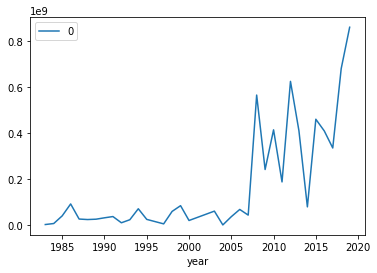

In [31]:
import matplotlib
df.groupby('year').sum().plot()

In [45]:
df.groupby('year').sum().reset_index().to_csv('salesByYear.csv')

In [42]:
df.groupby('year').sum()[0].values[:22].sum()

780406055

In [8]:
for mid in movieDict.keys():
    print(movieDict[mid])
    try:
        movieSales[mid] = domesticEarning(mid)
    except:
        print('not found')

Avengers: Endgame
Avengers: Infinity War
Spider-Man: Homecoming
Captain America: Civil War
Avengers: Age of Ultron
The Judge
Chef
Iron Man Three
The Avengers
Sherlock Holmes: A Game of Shadows
Due Date
Iron Man 2
Sherlock Holmes
The Soloist
Tropic Thunder
The Incredible Hulk
Iron Man
Charlie Bartlett
Lucky You
Zodiac
Fur: An Imaginary Portrait of Diane Arbus
A Scanner Darkly
The Shaggy Dog
A Guide to Recognizing Your Saints
Good Night, and Good Luck.
Kiss Kiss Bang Bang
Game 6
Eros
Gothika
The Singing Detective
Wonder Boys
Black & White
Bowfinger
Friends & Lovers
In Dreams
U.S. Marshals
The Gingerbread Man
Hugo Pool
Two Girls and a Guy
One Night Stand
Danger Zone
not found
Restoration
Home for the Holidays
Richard III
Only You
Natural Born Killers
Hail Caesar
not found
Short Cuts
Heart and Souls
Chaplin
Soapdish
Too Much Sun
not found
Air America
Chances Are
True Believer
That's Adequate
not found
1969
Rented Lips
not found
Johnny Be Good
Less Than Zero
The Pick-up Artist
America
not f

In [66]:
movies[10].find('a').get_text()

'Avengers: Age of Ultron'

In [54]:
for m in movies:
    print(m.contents[4])


(

(

(

(

(







(Video short)


















(Video)








(Video short)






(Video Game)








(Video short)












(TV Series)








(Short)
(uncredited)






(Short)




(TV Series)


(Short)


(Video short)


(Short)


























(TV Short)












































(TV Series)


(Short)


(TV Mini-Series)



















In [50]:
with open('countrySales.json') as json_file:
    data = json.load(json_file)
data

{'Eastern Mediterranean': {'Afghanistan': {'Communicable & other Group I': 102.5,
   'Injuries': 47,
   'Noncommunicable diseases': 110.4},
  'Bahrain': {'Communicable & other Group I': 0.2,
   'Injuries': 0.3,
   'Noncommunicable diseases': 2.7},
  'Djibouti': {'Communicable & other Group I': 3.4,
   'Injuries': 0.7,
   'Noncommunicable diseases': 3.1},
  'Egypt': {'Communicable & other Group I': 63.5,
   'Injuries': 31.6,
   'Noncommunicable diseases': 476.3},
  'Iran (Islamic Republic of)': {'Communicable & other Group I': 30.6,
   'Injuries': 39.8,
   'Noncommunicable diseases': 291.5},
  'Iraq': {'Communicable & other Group I': 33,
   'Injuries': 56.9,
   'Noncommunicable diseases': 104.6},
  'Jordan': {'Communicable & other Group I': 3.4,
   'Injuries': 3.1,
   'Noncommunicable diseases': 22.6},
  'Kuwait': {'Communicable & other Group I': 0.9,
   'Injuries': 1.3,
   'Noncommunicable diseases': 7.4},
  'Lebanon': {'Communicable & other Group I': 1.3,
   'Injuries': 2.8,
   'Nonco

In [7]:
df = pd.read_csv('country_sales.csv')
df.head()

,Unnamed: 0,Countries,Sales
0,0,United States,858373000
1,1,Austria,8376632
2,2,Belgium,8682740
3,3,Bulgaria,1469984
4,4,Croatia,1144369


In [18]:
csdict = df[['Countries', 'Sales']].set_index('Countries').Sales.to_dict()


In [51]:
keys = []
for a in data:
    keys.append(list(data[a].keys()))

In [53]:
l = []
todel = []
j = 0
for a in data:
    area = data[a]
    for i in range(len(keys[j])):
        country = keys[j][i]
        if country in csdict:
            print(country)
            area[country] = {'Sales': csdict[country]}
            l.append(country)
        else:
            del area[country]
    j += 1

Egypt
United Arab Emirates
Austria
Belgium
Bulgaria
Croatia
Denmark
Finland
France
Germany
Greece
Hungary
Iceland
Italy
Lithuania
Netherlands
Norway
Poland
Portugal
Romania
Slovakia
Slovenia
Spain
Sweden
Switzerland
Turkey
Ukraine
United Kingdom
Nigeria
South Africa
Argentina
Brazil
Chile
Colombia
Mexico
Paraguay
Uruguay
Australia
China
Japan
Malaysia
New Zealand
Philippines
Singapore
India
Indonesia
Thailand


In [40]:
len(todel)

135

In [45]:
set(csdict.keys()).difference(set(l))

{'Bolivia',
 'Czech Republic',
 'Hong Kong',
 'Russia/CIS',
 'Serbia and Montenegro',
 'South Korea',
 'Taiwan',
 'United States',
 'Venezuela',
 'Vietnam'}

In [59]:
data['Americas']['United States of America'] = {'Sales': csdict['United States']}
data['Europe']['Russian Federation'] = {'Sales': csdict['Russia/CIS']}
data['Europe']['Bolivia (Plurinational State of)'] = {'Sales': csdict['Bolivia']}
data['Europe']['Serbia'] = {'Sales': csdict['Serbia and Montenegro']}
data['Western Pacific']['Republic of Korea'] = {'Sales': csdict['South Korea']}
data['Europe']['"Czechia"'] = {'Sales': csdict['Czech Republic']}
data['Western Pacific']['Viet Nam'] = {'Sales': csdict['Vietnam']}


In [60]:
with open('data.json', 'w') as f:
    json.dump(data, f)

## Other resources!

This assignment doesn't have a restriction on where you can look for data.
Further, we don't mind how you collect the data, or what data you collect.

Here are some additional resources for this example, and you can customize it for your own!
* Arnold Schwarzenegger Kill Count: https://www.youtube.com/watch?v=OE6jpTaOYMU
* Arnold Schwarzenegger Top Quotes: https://www.youtube.com/watch?v=pDxn0Xfqkgw

You could think about the IMDB network as a graph, with different actors connected through movies.

Some other useful libraries/ databases:
* IMDBPy
* http://www.omdbapi.com/